 # Loading and Exploring Social Media and Telecom Dataset

 ## Explanation

 This section connects to Google Drive and loads two datasets—Social Media and Telecom—into pandas DataFrames. It allows for an initial exploration by printing the first few rows of each dataset, providing insight into the structure and types of data available.

In [1]:
# Import necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Defining file paths for both datasets
socialmedia_path = '/content/drive/MyDrive/socialmedia.csv'  # Update if in a specific folder
telecom_path = '/content/drive/MyDrive/telecom.csv'  # Update if in a specific folder

# Load the social media dataset
socialmedia_df = pd.read_csv(socialmedia_path)
print("Social Media Dataset:")
print(socialmedia_df.head())  # Display the first few rows

# Load the telecom dataset
telecom_df = pd.read_csv(telecom_path)
print("\nTelecom Dataset:")
print(telecom_df.head())  # Display the first few rows







Mounted at /content/drive
Social Media Dataset:
   Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441   Photo         2          12             4          3   
1            139441  Status         2          12             3         10   
2            139441   Photo         3          12             3          3   
3            139441   Photo         2          12             2         10   
4            139441   Photo         2          12             2          3   

   Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0   0.0                       2752                             5091   
1   0.0                      10460                            19057   
2   0.0                       2413                             4373   
3   1.0                      50128                            87991   
4   0.0                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  \
0 

# New Section

 # Social Media  Data Cleaning of for Modelling

## Explanation

This section focuses on the data cleaning necessary for preparing the Social Media Metrics dataset for machine learning. It includes selecting relevant input features and the target variable, handling missing values, and previewing the cleaned dataset. These steps are essential before applying any modelling techniques.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Social Media Metrics dataset
socialmedia_df = pd.read_csv('/content/drive/MyDrive/socialmedia.csv')

# Selecting relevant features and target variable
features = ['Page total likes', 'Type', 'Category', 'Post Hour', 'Paid']
X_socialmedia = socialmedia_df[features]
y_socialmedia = socialmedia_df['Lifetime Engaged Users']

# Handling missing values
X_socialmedia = X_socialmedia.fillna(0)  # Replace with more appropriate imputation if needed

# Display dataset structure
print("Features dataset:")
print(X_socialmedia.head())
print("\nTarget variable:")
print(y_socialmedia.head())


# Data Preprocessing and Pipeline Setup for Regression Modelling

## Explanation

This section defines the preprocessing steps and creates a machine learning pipeline for predicting user engagement (Lifetime Engaged Users) using a linear regression model. It also prepares the data for training and testing by splitting it into subsets.


In [ ]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Page total likes', 'Post Hour', 'Paid']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Type', 'Category'])
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets (80-20 split)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_socialmedia, y_socialmedia, test_size=0.2, random_state=42)


# Model Training, Prediction, and Evaluation

## Explanation

This section completes the regression modeling process by training the pipeline, generating predictions, and evaluating performance on both training and test datasets. This helps assess how well the model generalizes to new, unseen data.



In [ ]:
# Fit the model on training data
pipeline.fit(X_train_sm, y_train_sm)

# Make predictions on both training and testing data
y_train_pred_sm = pipeline.predict(X_train_sm)
y_test_pred_sm = pipeline.predict(X_test_sm)

# Evaluate the model
train_mse_sm = mean_squared_error(y_train_sm, y_train_pred_sm)
test_mse_sm = mean_squared_error(y_test_sm, y_test_pred_sm)
train_r2_sm = r2_score(y_train_sm, y_train_pred_sm)
test_r2_sm = r2_score(y_test_sm, y_test_pred_sm)

print(f"Training MSE: {train_mse_sm}, Training R²: {train_r2_sm}")
print(f"Testing MSE: {test_mse_sm}, Testing R²: {test_r2_sm}")


Training MSE: 851154.5821688741, Training R²: 0.20570089686390247
Testing MSE: 459291.161656748, Testing R²: 0.1558370513520827


# Interpreting Model Coefficients to Identify Feature Importance

## Explanation

This section extracts and displays the importance of each feature in the regression model by analyzing the coefficients assigned during training. It provides insight into which variables most significantly affect predicted user engagement.



In [ ]:
# Get feature names after encoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['Type', 'Category'])
all_feature_names = ['Page total likes', 'Post Hour', 'Paid'] + list(feature_names)

# Model coefficients
coefficients = pipeline.named_steps['regressor'].coef_

# Display feature importance
feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)
print("\nFeature Importance (sorted by absolute coefficient values):")
print(feature_importance)




Feature Importance (sorted by absolute coefficient values):
            Feature  Coefficient
3         Type_Link -1131.852370
5       Type_Status   994.154893
6        Type_Video   652.484424
4        Type_Photo  -514.786947
0  Page total likes  -231.231917
2              Paid   132.694985
7        Category_1    63.564900
1         Post Hour   -56.536562
8        Category_2   -33.876303
9        Category_3   -29.688597


# Loading and Inspecting the Telecom Churn Dataset

## Explanation

This section loads the Telecom Churn dataset and performs an initial data inspection to prepare for churn prediction. It identifies the target variable (Churn) and separates it from the feature set (X_telecom), setting the stage for future preprocessing and model building.




In [ ]:
import pandas as pd

# Load the churn dataset (make sure the path is correct)
telecom_df = pd.read_csv('/content/drive/MyDrive/telecom.csv')

# Check the first few rows of the dataset to confirm it loaded correctly
print("Dataset Sample:")
print(telecom_df.head())

# Define the target variable 'Churn' and separate features
X_telecom = telecom_df.drop(columns=['Churn'], errors='ignore')
y_telecom = telecom_df['Churn']

# Verify column names and structure of the data
print("\nFeature Columns:")
print(X_telecom.columns)
print("\nTarget Variable Sample:")
print(y_telecom.head())


Dataset Sample:
   Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       2

# Churn Prediction Using Logistic Regression and KNN with Model Comparison

## Explanation

### Data Preparation and Cleaning
The telecom dataset was loaded from Google Drive and inspected for missing values.

Missing data was handled by dropping rows with null entries to ensure the dataset was clean and complete before modeling.

### Feature Selection and Separation
The target variable is 'Churn', indicating whether a customer left the service.

All remaining columns were treated as input features, further divided into:

Numerical features (e.g., age, usage metrics)

Categorical features (Age Group, Tariff Plan, Status)

### Preprocessing Pipeline
To prepare the data for modeling:

Numerical features were standardized using StandardScaler to ensure all values are on a similar scale.

Categorical features were encoded using OneHotEncoder, converting categories into a machine-readable numeric format.

A ColumnTransformer combined these preprocessing steps, and each model was embedded in a pipeline to ensure consistent processing.

###  Model Training and Evaluation
The dataset was split into training (80%) and testing (20%) sets.

#### Two models were trained:

Logistic Regression: A linear classifier suitable for binary classification and interpreting feature importance.

K-Nearest Neighbors (KNN): A distance-based classifier that predicts labels based on the nearest data points in the feature space.

Each model was evaluated using accuracy score on the test set, providing an initial measure of predictive performance.

###  Hyperparameter Tuning for KNN
Since KNN’s performance depends heavily on the choice of K (number of neighbors), a loop tested values of K from 1 to 20.

The accuracy for each K was recorded and visualized using a line plot.

The optimal K was identified — the one that achieved the highest test accuracy.

### Feature Importance Analysis (Logistic Regression)
Coefficients from the logistic regression model were extracted to assess the impact of each feature on churn.

Positive coefficients indicate features that increase the likelihood of churn.

Negative coefficients indicate features that decrease the likelihood.

This insight helps stakeholders understand which variables are most critical in predicting customer behavior.



Missing Values: Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64
Logistic Regression Accuracy: 0.8698412698412699
KNN Accuracy (K=5): 0.9317460317460318


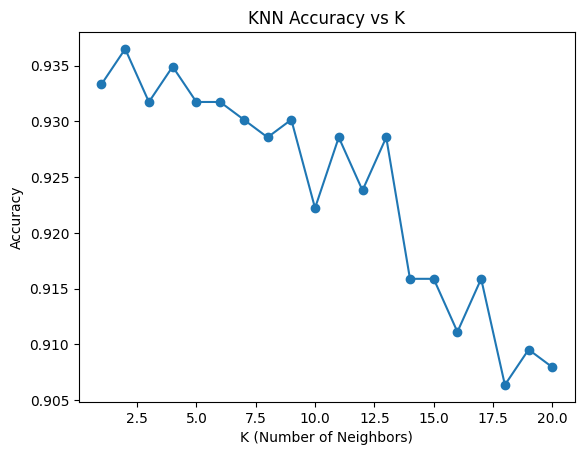

Best K for KNN: 2
                    Feature  Coefficient
1                 Complains     1.103923
0             Call  Failure     0.868096
4            Seconds of Use     0.865874
14              Age Group_2     0.695437
16              Age Group_4     0.675648
15              Age Group_3     0.533240
10                   Status     0.351586
12           Customer Value     0.192794
8                 Age Group     0.149933
21                 Status_2     0.148200
9               Tariff Plan     0.137933
19            Tariff Plan_2     0.036391
18            Tariff Plan_1    -0.046620
11                      Age    -0.154419
20                 Status_1    -0.158429
2      Subscription  Length    -0.175953
7   Distinct Called Numbers    -0.365365
3            Charge  Amount    -0.629595
17              Age Group_5    -0.918529
13              Age Group_1    -0.996025
6          Frequency of SMS    -1.728051
5          Frequency of use    -2.192656


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
telecom_path = '/content/drive/MyDrive/telecom.csv'  # Update if in a specific folder
telecom_df = pd.read_csv(telecom_path)


# Check for missing values
print("Missing Values:", telecom_df.isnull().sum())

# Handle missing values (for simplicity, we'll drop rows with missing values)
telecom_df = telecom_df.dropna()

# Define feature columns and target variable
X_telecom = telecom_df.drop('Churn', axis=1)  # Features
y_telecom = telecom_df['Churn']  # Target

# Separate categorical and numerical features
categorical_features = ['Age Group', 'Tariff Plan', 'Status']  # Example of categorical features
numerical_features = X_telecom.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ])

# Create a pipeline for Logistic Regression and KNN models
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_telecom, y_telecom, test_size=0.2, random_state=42)

# Train Logistic Regression model
logreg_pipeline.fit(X_train, y_train)

# Train KNN model (with K=5)
knn_pipeline.fit(X_train, y_train)

# Predictions
logreg_preds = logreg_pipeline.predict(X_test)
knn_preds = knn_pipeline.predict(X_test)

# Evaluate models using accuracy
logreg_accuracy = accuracy_score(y_test, logreg_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"KNN Accuracy (K=5): {knn_accuracy}")

# Explore effect of changing K in KNN
k_values = range(1, 21)  # Test K values from 1 to 20
knn_accuracies = []

for k in k_values:
    knn_pipeline.set_params(classifier=KNeighborsClassifier(n_neighbors=k))
    knn_pipeline.fit(X_train, y_train)
    knn_preds = knn_pipeline.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, knn_preds))

# Plot accuracy vs K
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy vs K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

# Best K
best_k = k_values[knn_accuracies.index(max(knn_accuracies))]
print(f"Best K for KNN: {best_k}")

# Analysis: Most important features based on model coefficients (Logistic Regression)
logreg_coef = logreg_pipeline.named_steps['classifier'].coef_[0]
feature_names = numerical_features + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': logreg_coef})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


# Churn Prediction Results and Analysis

## Model Performance Summary

After preprocessing and training both models on the telecom dataset, the following results were observed:

### Logistic Regression Accuracy: 86.98%

### K-Nearest Neighbors (K=5) Accuracy: 93.17%

Optimal K for KNN: 2 yielded the highest accuracy among the tested values (1–20).

These results indicate that KNN outperformed Logistic Regression in terms of predictive accuracy, making it the stronger model for identifying churn risk in this dataset.